Preprocessing phase:
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated. 

In [ ]:
 #importing the dataset from local drive
from google.colab import files


uploaded = files.upload()
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['titanic-passengers.csv']),sep=";")


Saving titanic-passengers.csv to titanic-passengers.csv


In [ ]:
#showing the head of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
#showing general information about the data columns and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


#Preprocessing

In [ ]:
#Showing missing values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
#finding columns with missing values
x=df.isnull().sum()
x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Replacing mising numerical values 

df["Age"].fillna(df["Age"].median(),inplace=True)
#Replacing mising categorical values with 'other'
df["Cabin"].fillna('Other',inplace=True)
df["Embarked"].fillna('Other',inplace=True)
print("The number of mising values is now  ",df.isnull().sum().sum())

The number of mising values is now   0


#Visualization

In [ ]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt


**Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.**

Text(0.5, 1.0, 'Distribution of Variable Age')

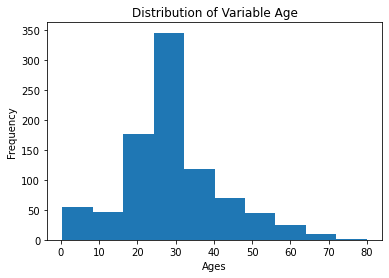

In [ ]:
#Distribution of Variable Age
df["Age"].plot.hist()
plt.xlabel("Ages")
plt.title("Distribution of Variable Age")

Ages range from 0 to 80.
Most frequent ages are between 15 and 30.
The least frequent ages are between 70 and 80 years old.

Text(0.5, 1.0, 'Distribution of Variable Sex')

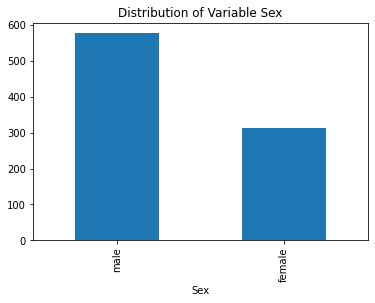

In [ ]:
#Distribution of Variable Sex
vc=df["Sex"].value_counts()
vc.plot.bar()
plt.xlabel("Sex")
plt.title("Distribution of Variable Sex")

The number of male passengers was higher than the number of female passengers.

Text(0.5, 1.0, 'Distribution of Variable Embarked')

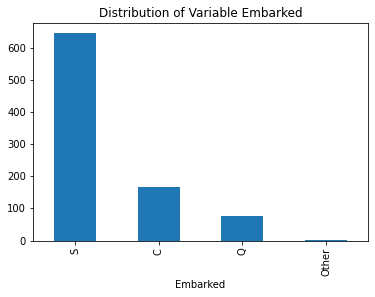

In [ ]:
#Distribution of Variable Embarked
vc=df["Embarked"].value_counts()
vc.plot.bar()
plt.xlabel("Embarked")
plt.title("Distribution of Variable Embarked")

Passengers embarked mainly from Southampton, Cherbourg, and Queenstown.
Most travelers embarked from Southampton.
Only a few passengers embarked from Queenstown or other regions.

Text(0.5, 1.0, 'Distribution of Variable Pclass')

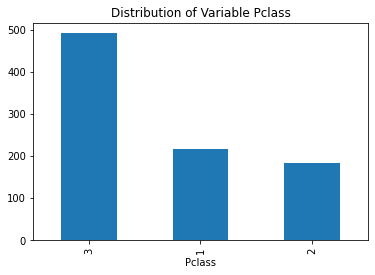

In [ ]:
#Distribution of Variable Pclass
vc=df["Pclass"].value_counts()
vc.plot.bar()
plt.xlabel("Pclass")
plt.title("Distribution of Variable Pclass")

There were three passenger classes.
Class 3 passengers are the most frequent, and class 2 passengers are the least frequent.

Text(0.5, 1.0, 'Distribution of Variable Survived')

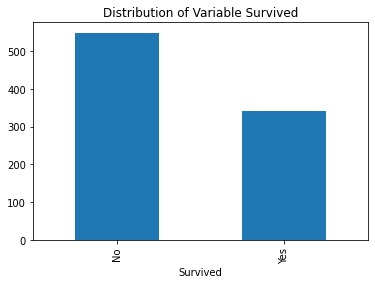

In [ ]:
#Distribution of the Target
vc=df["Survived"].value_counts()
vc.plot.bar()
plt.xlabel("Survived")
plt.title("Distribution of Variable Survived")

The number of passengers who did not survive exceeds the number of survivors.

**Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.**

**Pick two other features and study their impact on the survival of the individuals.**

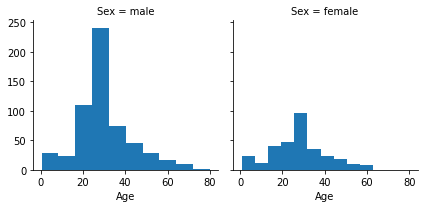

In [ ]:
#Correlation between Age and Sex
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,"Age")

Male Ages range from 0 to 80 and most frequent ages are between 25 and 35; the least frequent male ages are between 70 and 80
Female ages range from 0 to  65 and most frequent ages are between 25 and and 35.
The least frequent female ages are between 10 and 15 as well as between 60 and 65.

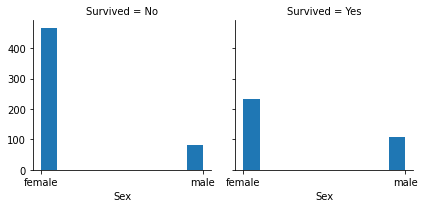

In [ ]:
#Correlation between Sex and Survival
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"Sex")

The number of female that did not survive exceeds the number of males that did not survive.
The number of female survivors exceeds the number of male survivors.

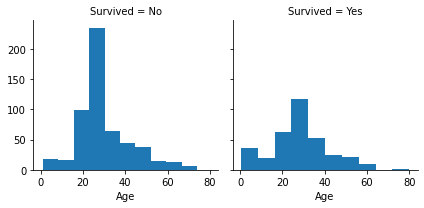

In [ ]:
#Correlation between Age and Survival
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"Age")

Ages of survivors range from 0 to 80, however there is a gap between 65 and 70 years old for those who did not survive, ages of most survivors are between 25 and 35, the least frequent survivors ages are between 75 and 80.
Ages of those who did not survive range from 0 to 75 and the most frequent are 
between 25 and 30 and the least frequent are between 65 and 75


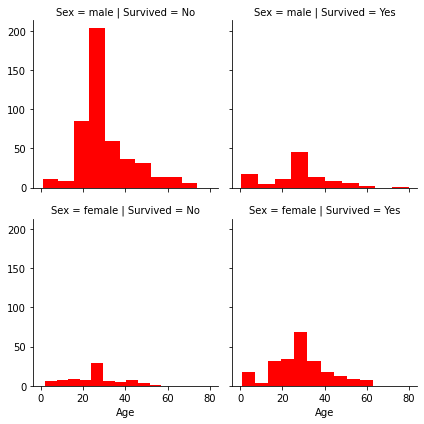

In [ ]:
#Impact of Age and Sex on Survival
g=sns.FacetGrid(df,row="Sex",col="Survived")
g.map(plt.hist,"Age",color="red")

* males who did not survive ages are between 0 and 75, most frequent ages are between 25 and 35, the least frequent are between 10 and 15  as well as between 70 and 75.
* males survivors ages are between 0 and 80 most frequent ages are between 25 and 35, the least frequent are between 65 and 70.
* females who did not survive ages are between 0 and 55, most frequent ages are between 25 and 30, the least frequent are between 50 and 55.
* female survivors ages are between 0 and 65, most frequent ages are between 25 and 35, the least frequent are between 50 and 55.

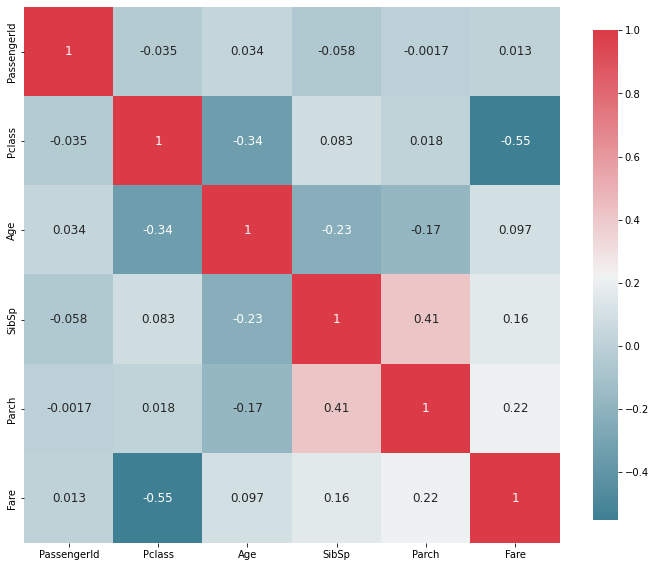

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },  ax=ax,  annot = True,  annot_kws = { 'fontsize' : 12 } )
plot_correlation_map( df )

Interpretation of the function:
The function "plot_correlation_map" takes a given data frame and its variables and returns the correlation matrix that gives the correlations between each variables, for example the correlation between the variable PassengerId and Pclass is -0.035  . It also uses the function heat map that colors the correlation values according to a color palette to distinguish between high positive correlations which are given a darker shade of red and high negative correlations that get a darker shade of blue.  

In [ ]:
#Turning Variable Survived into a numerical variable
surv={"Survived":{"Yes":1,"No":0}}
df.replace(surv,inplace=True)
df["Survived"].head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: Survived, dtype: int64

**Use the groupby function combined with the mean() to view the relation between Pclass and survived **

In [ ]:
#Groupby with mean to view the relation between Pclass and survived
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


As a final step, try to drop the useless columns (such as Names)
We dropped the column Names because we evaluated it to be useless. 
But that's ultimately not the case because we can create a very useful feature from Names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual. Hint: Extract the title from the column Names. 

In [ ]:
df["Title"]=df["Name"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,Other,S,"Collander, Mr. Erik Gustaf"
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,"Moen, Mr. Sigurd Hansen"
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,Other,S,"Jensen, Mr. Hans Peder"
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,Other,S,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,"Davidson, Mr. Thornton"


In [ ]:
#Extracting the title from the column Names.
#we can notice that most tites are written between " ," and "."

i=-1
for n in df["Name"]:
  i+=1
  count=-1

  for ch in n:
       count+=1
       if ch==",":
          beg=count
       if ch==".":
          end=count
  x=n[(beg+2):(end)]
  df["Title"][i]=x
df["Title"].head(10)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0      Mr
1      Mr
2      Mr
3     Mrs
4      Mr
5      Mr
6      Mr
7    Miss
8      Mr
9     Mrs
Name: Title, dtype: object

In [ ]:
#Checking for Names for which we couldn't extract the title
#Checking if some titles are written with space
ind=-1
for t in df["Title"]:
  ind+=1
  ct=0
  for s in t:
    if s==" ":
      ct+=1
 
  if ct!=0:
    p="index="+str(ind)+" Name="+t
    print(p)
    
    


index=755 Name=the Countess
index=857 Name=Mrs. Martin (Elizabeth L


In [ ]:
#correcting the title with index 857
df["Title"][857]="Mrs"
df["Title"][857]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Mrs'

**As you have seen, there are a lot of titles which makes the feature very impractical. Let's try to group these titles into more useful ones.**

**Hint: Use the following dictionary**

In [ ]:


Title_Dictionary= {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


In [ ]:
#Using one label encoder to change titles
changing_titles={"Title":Title_Dictionary}
df.replace(changing_titles, inplace=True)
df["Title"].head(10)

0     Mrs
1     Mrs
2     Mrs
3     Mrs
4     Mrs
5     Mrs
6     Mrs
7    Miss
8     Mrs
9     Mrs
Name: Title, dtype: object

In [ ]:
#Dropping the column Name
df=df.drop("Name",axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,male,28.0,0,0,248740,13.0000,Other,S,Mrs
1,76,0,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,male,20.0,0,0,350050,7.8542,Other,S,Mrs
3,568,0,3,female,29.0,0,4,349909,21.0750,Other,S,Mrs
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


In [ ]:
df["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

**Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.**

In [ ]:
#Family Size:
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,1


In [ ]:
df["FamilySize"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

Text(0.5, 1.0, 'Distribution of Variable Family Size')

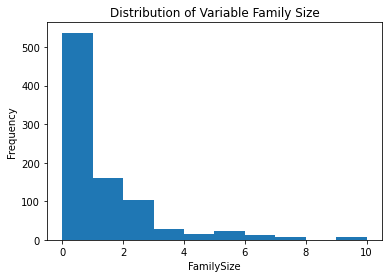

In [ ]:
df["FamilySize"].plot.hist()
plt.xlabel("FamilySize")
plt.title("Distribution of Variable Family Size")

Family sizes range from 0 to 10 
Most frequent family sizes are 0.
Least frequent family sizes are 8 and 9.

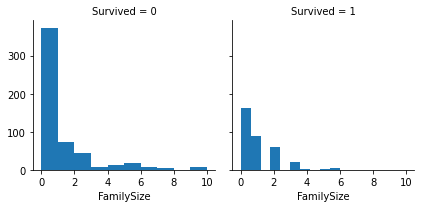

In [ ]:

g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"FamilySize")

Families with low family sizes did not survive

Passengers with no families have a high non survival frequency (more than 350)
Passengers with no families have the highest survival frequency
